In [7]:
import numpy as np

def calculate_b(position_alpha, position_beta, speed_beta, delta_t, direction_beta):
    """
    Calculates the effective semi-minor axis `b` for the repulsive force potential.

    Parameters:
    - position_alpha: Position of pedestrian alpha (numpy array of shape (2,))
    - position_beta: Position of pedestrian beta (numpy array of shape (2,))
    - speed_beta: Speed of pedestrian beta (scalar)
    - delta_t: Time interval or step duration (scalar)
    - direction_beta: Unit direction vector of pedestrian beta's movement (numpy array of shape (2,))

    Returns:
    - b: The semi-minor axis `b`, representing the effective distance considering both position and movement.
    """
    # Calculate relative position vector r_ab
    r_ab = position_alpha - position_beta
    # Magnitude of the relative position vector
    r_ab_norm = np.linalg.norm(r_ab)

    # Calculate the anticipated position of beta after delta_t
    future_position_beta = position_beta + speed_beta * delta_t * direction_beta
    # Calculate relative position vector after time step
    r_ab_future = position_alpha - future_position_beta
    # Magnitude of the future relative position vector
    r_ab_future_norm = np.linalg.norm(r_ab_future)

    # Compute b using the formula
    b = np.sqrt((r_ab_norm + r_ab_future_norm) ** 2 - (speed_beta * delta_t) ** 2)
    return b

# Example usage:
# Define positions as numpy arrays (2D for simplicity)
position_alpha = np.array([1.0, 1.0])  # Position of pedestrian alpha
position_beta = np.array([0.0, 0.0])   # Position of pedestrian beta
speed_beta = 1.5                        # Speed of pedestrian beta
delta_t = 0.5                           # Step duration
direction_beta = np.linalg.norm([-1.0, -1.5])   # Direction of beta's movement (along x-axis)

# Calculate b
b = calculate_b(position_alpha, position_beta, speed_beta, delta_t, direction_beta)
print(f"The calculated value of b is: {b}")


The calculated value of b is: 1.758905909933786


13.16263020812858


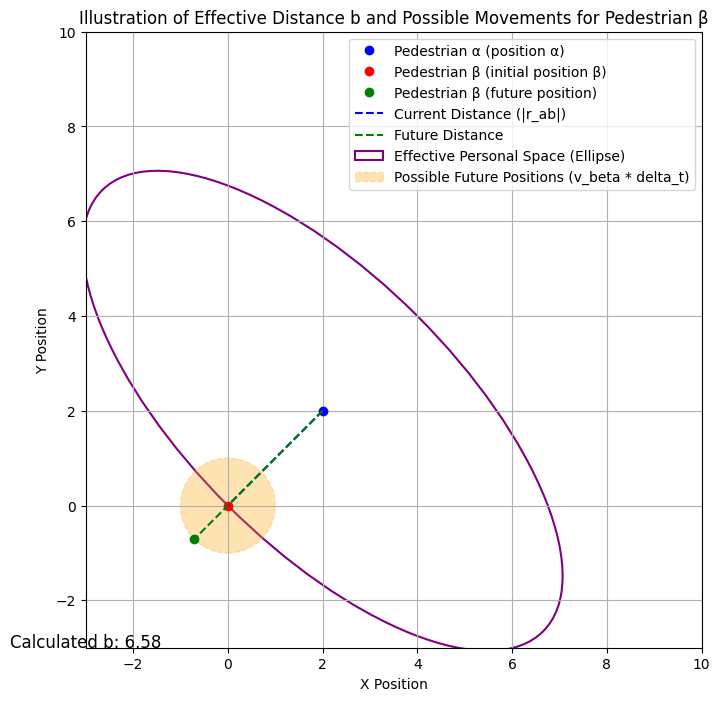

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and parameters
position_alpha = np.array([2.0, 2.0])  # Position of pedestrian alpha
position_beta = np.array([0.0, 0.0])   # Initial position of pedestrian beta
speed_beta = 1.0                       # Speed of pedestrian beta
delta_t = 1.0                          # Step duration
direction_beta = np.array([-1.0, -1.0])  # Direction of beta's movement (normalized)

# Normalize the direction vector
direction_beta /= np.linalg.norm(direction_beta)

# Calculate future position of beta
future_position_beta = position_beta + speed_beta * delta_t * direction_beta

# Calculate distances
r_ab = position_alpha - position_beta  # Current relative position vector
r_ab_norm = np.linalg.norm(r_ab)       # Current distance

r_ab_future = position_alpha - future_position_beta  # Future relative position vector
r_ab_future_norm = np.linalg.norm(r_ab_future)       # Future distance

# Calculate b
b = np.sqrt((r_ab_norm + r_ab_future_norm)**2 - (speed_beta * delta_t)**2)

# Calculate the angle of separation (in degrees)
angle_of_separation = np.degrees(np.arctan2(r_ab[1], r_ab[0]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot alpha and beta
ax.plot(position_alpha[0], position_alpha[1], 'bo', label="Pedestrian α (position α)")
ax.plot(position_beta[0], position_beta[1], 'ro', label="Pedestrian β (initial position β)")
ax.plot(future_position_beta[0], future_position_beta[1], 'go', label="Pedestrian β (future position)")

# Draw lines for current and future distances
ax.plot([position_alpha[0], position_beta[0]], [position_alpha[1], position_beta[1]], 'b--', label="Current Distance (|r_ab|)")
ax.plot([position_alpha[0], future_position_beta[0]], [position_alpha[1], future_position_beta[1]], 'g--', label="Future Distance")

# Draw ellipse around alpha to represent influence zone
ellipse_center = position_alpha
ellipse_width = 2 * r_ab_norm   # Major axis (current distance)
ellipse_height = 2 * b          # Minor axis (effective distance, b)

print(2 * b)

ellipse = plt.matplotlib.patches.Ellipse(ellipse_center, ellipse_width, ellipse_height,
                                         angle=angle_of_separation, edgecolor='purple', facecolor='none',
                                         linestyle='-', linewidth=1.5, label="Effective Personal Space (Ellipse)")

ax.add_patch(ellipse)

# Draw circle around beta representing possible future positions within v_beta * delta_t radius
circle_radius = speed_beta * delta_t
possible_positions_circle = plt.Circle(position_beta, circle_radius, color='orange', alpha=0.3, linestyle='--', 
                                       label="Possible Future Positions (v_beta * delta_t)")

ax.add_patch(possible_positions_circle)

# Set plot limits and labels
ax.set_xlim(-3, 10)
ax.set_ylim(-3, 10)
ax.set_aspect('equal', 'box')
ax.text(0, 0, f"Calculated b: {b:.2f}", transform=ax.transAxes, fontsize=12, color="black", ha="center")

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Illustration of Effective Distance b and Possible Movements for Pedestrian β")

# Show legend
ax.legend()
plt.grid(True)
plt.show()


9.096436995003097


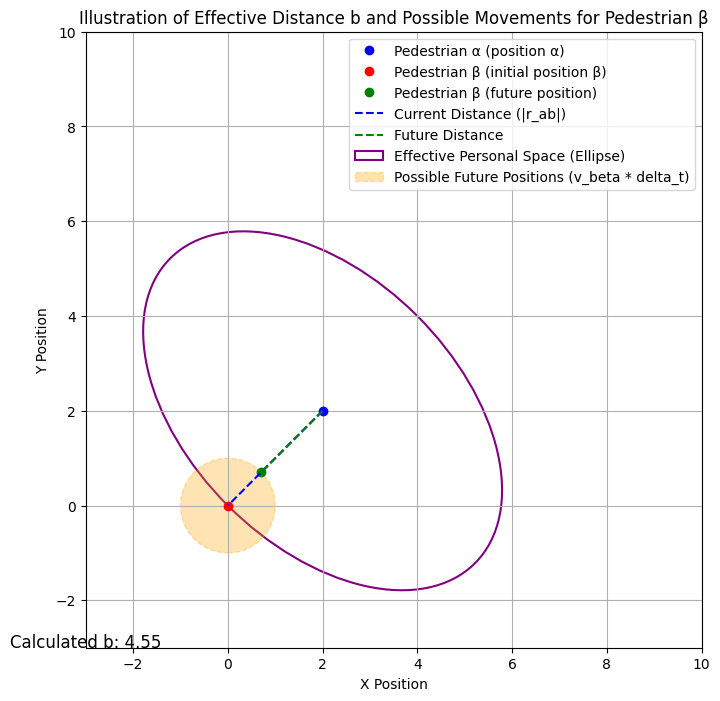

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and parameters
position_alpha = np.array([2.0, 2.0])  # Position of pedestrian alpha
position_beta = np.array([0.0, 0.0])   # Initial position of pedestrian beta
speed_beta = 1.0                       # Speed of pedestrian beta
delta_t = 1.0                          # Step duration
direction_beta = np.array([1.0, 1.0])  # Direction of beta's movement (normalized)

# Normalize the direction vector
direction_beta /= np.linalg.norm(direction_beta)

# Calculate future position of beta
future_position_beta = position_beta + speed_beta * delta_t * direction_beta

# Calculate distances
r_ab = position_alpha - position_beta  # Current relative position vector
r_ab_norm = np.linalg.norm(r_ab)       # Current distance

r_ab_future = position_alpha - future_position_beta  # Future relative position vector
r_ab_future_norm = np.linalg.norm(r_ab_future)       # Future distance

# Calculate b
b = np.sqrt((r_ab_norm + r_ab_future_norm)**2 - (speed_beta * delta_t)**2)

# Calculate the angle of separation (in degrees)
angle_of_separation = np.degrees(np.arctan2(r_ab[1], r_ab[0]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot alpha and beta
ax.plot(position_alpha[0], position_alpha[1], 'bo', label="Pedestrian α (position α)")
ax.plot(position_beta[0], position_beta[1], 'ro', label="Pedestrian β (initial position β)")
ax.plot(future_position_beta[0], future_position_beta[1], 'go', label="Pedestrian β (future position)")

# Draw lines for current and future distances
ax.plot([position_alpha[0], position_beta[0]], [position_alpha[1], position_beta[1]], 'b--', label="Current Distance (|r_ab|)")
ax.plot([position_alpha[0], future_position_beta[0]], [position_alpha[1], future_position_beta[1]], 'g--', label="Future Distance")

# Draw ellipse around alpha to represent influence zone
ellipse_center = position_alpha
ellipse_width = 2 * r_ab_norm   # Major axis (current distance)
ellipse_height = 2 * b          # Minor axis (effective distance, b)

print(2 * b)

ellipse = plt.matplotlib.patches.Ellipse(ellipse_center, ellipse_width, ellipse_height,
                                         angle=angle_of_separation, edgecolor='purple', facecolor='none',
                                         linestyle='-', linewidth=1.5, label="Effective Personal Space (Ellipse)")

ax.add_patch(ellipse)

# Draw circle around beta representing possible future positions within v_beta * delta_t radius
circle_radius = speed_beta * delta_t
possible_positions_circle = plt.Circle(position_beta, circle_radius, color='orange', alpha=0.3, linestyle='--', 
                                       label="Possible Future Positions (v_beta * delta_t)")

ax.add_patch(possible_positions_circle)

# Set plot limits and labels
ax.set_xlim(-3, 10)
ax.set_ylim(-3, 10)
ax.set_aspect('equal', 'box')
ax.text(0, 0, f"Calculated b: {b:.2f}", transform=ax.transAxes, fontsize=12, color="black", ha="center")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Illustration of Effective Distance b and Possible Movements for Pedestrian β")

# Show legend
ax.legend()
plt.grid(True)
plt.show()
